<a href="https://colab.research.google.com/github/uliana1406/pine-course-pub/blob/main/lecture_2_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 2: Fundamentals of Machine Learning

#1. What is Machine Learning?

Machine learning is a branch of artificial intelligence focused on enabling machines and computers to learn from its experience, obseravations and mistakes, just like humans do. It has its roots in statistics and mathematical data modelling, and it's common to think about machine learning models in mathematical terms. Fundamentally, a machine learning model is a software application that encapsulates a function to calculate an output value based on one or more input values. The process of defining that function is known as training. After the function has been defined, you can use it to predict new values in a process called inferencing.


# cool picture

Here's the breakdown of a basic  machine learning algorithm:

1. Training: the training data consists of past observations.In most cases, the observations include the observed attributes or features of the thing being observed, and the known value of the thing you want to train a model to predict (known as the label). In mathematical terms, the features are referred as **x**, and the label is referred to as **y**. Usually, an observation consists of multiple feature values, so **x** is actually a vector (an array with multiple values).

2. An algorithm is applied to the data to try to determine a relationship between the features and the label, and generalize that relationship as a calculation that can be performed on x to calculate y. The basic principle is to try to fit a function to the data, in which the values of the features can be used to calculate the label.

3. The result of the algorithm is a model that encapsulates the calculation derived by the algorithm as a function In mathematical notation:

      **y = f(x)**

4. Last step: inference, It is the process that a trained machine learning model uses to draw conclusions from brand-new data. The newly predicted label are often refered as ŷ in mathematical terms.

To make it easier to undertand machine learning concepts, we will demonstrate them on two examples from general physics and geomechanics:

1. Relation between grain size and hydraulic conductivity in borehole soils
2. Relation between soil content and permeability
3. Relation between grain size and soil type: is it sand?
4. Relation between grain size and soil type: what type of soil is it?

#2. Types of Machine learning

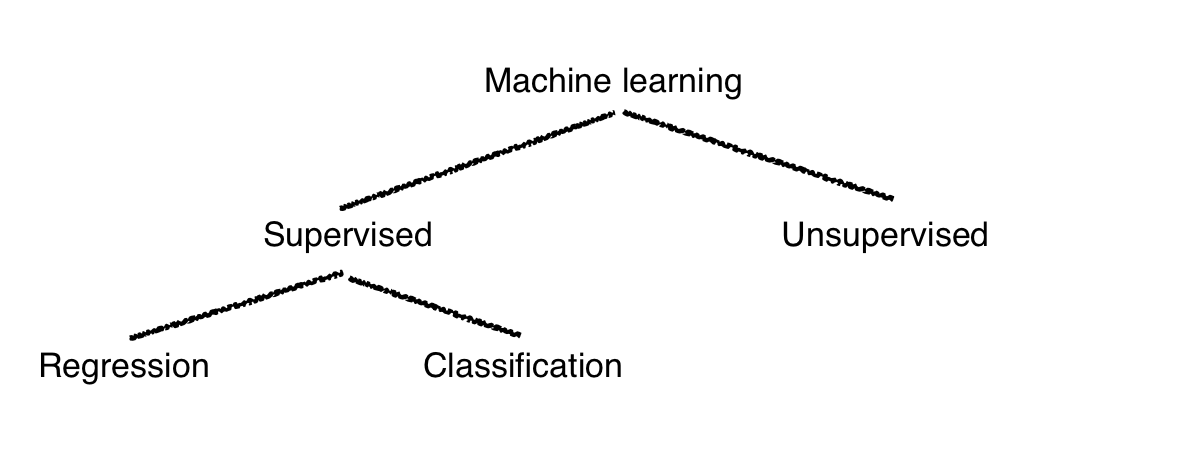

Two main types of Machine learning algorithms are supervised and unsupervised algorithms:

* When the algorithm is supervised, both features **x** and labels **y** are known in the training dataset. It is used to train models by determining a relationship between the features and labels. The two forms of supervised Machine Learning, that a most relevant for us today are *regression* and *classification*.

* Unsupervised machine learning involves training models using data that consists only of feature values without any known labels. Unsupervised machine learning algorithms determine relationships between the features of the observations in the training data.

#3. Regression

Regression models are trained to predict numeric label values. The process for training a regression model involves multiple iterations in which an appropriate algorithm is used to train a model, evaluate the model's predictive performance, and refine the model by repeating the training process with different algorithms and parameters until you achieve an acceptable level of predictive accuracy.

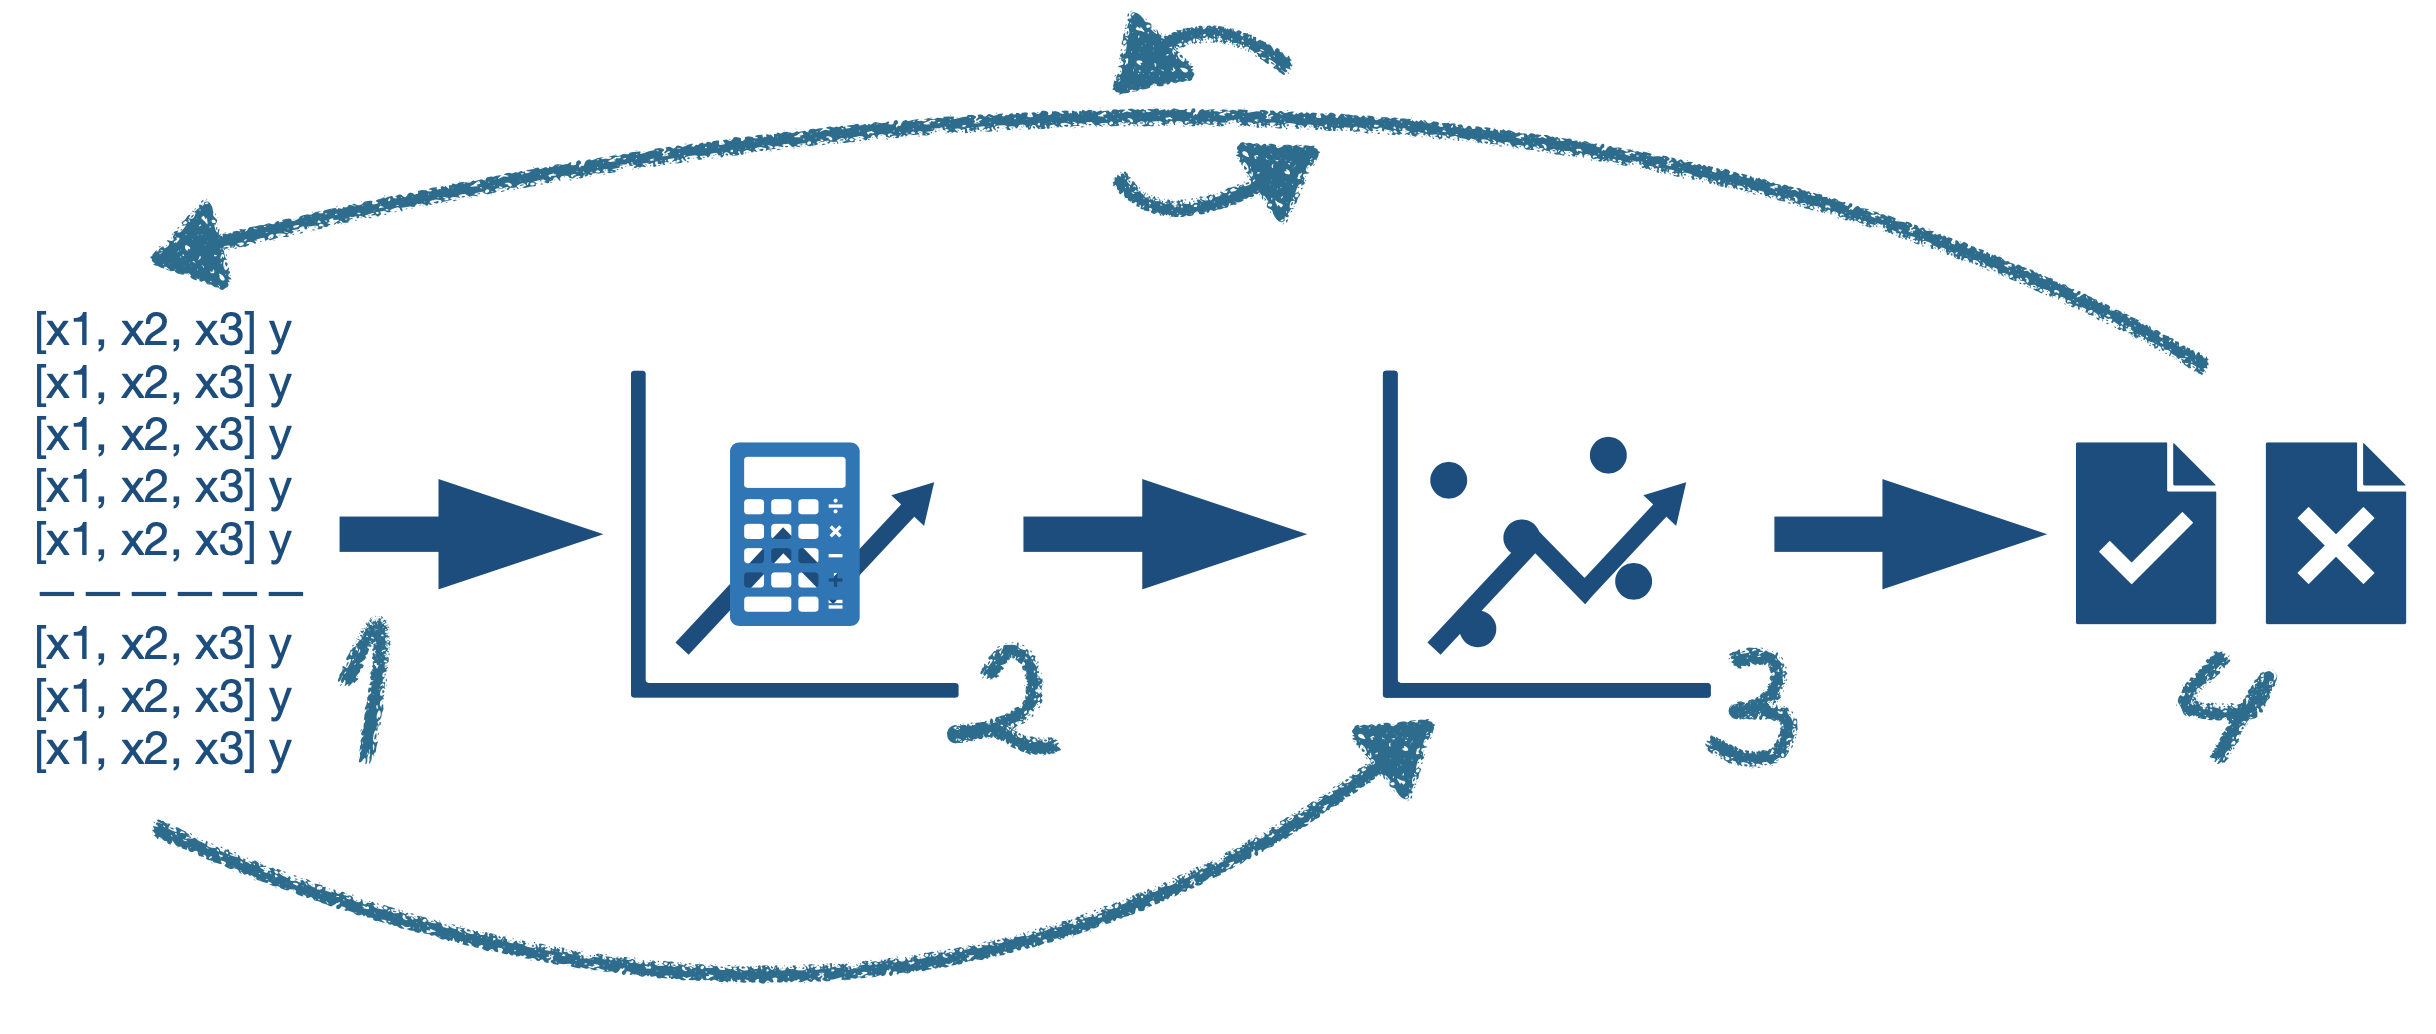

General regression algorithm:

1. Splitting the data into training set and a smaller validation set that will be used later

2. Fitting the data using algoritms (linear regression, polynomial regression etc)

3. Validating the model with the validation dataset from step 1 by predicting labels **ŷ** from the features **x**

4. Comparing the actual labels from validation dataset **y** and predicted labels **ŷ**, then using the difference between them to calculate accuracy metrics. If accuracy metrics are unsatisfactory, go back to step 1 and repeat, until the model is accurate enough.

Important definitions:

- **Bias** measures the average difference between predicted values and true values. As bias increases, a model predicts less accurately on a training dataset. High bias refers to high error in training.

- **Variance** measures the difference between predictions across various realizations of a given model. As variance increases, a model predicts less accurately on unseen data. High variance refers to high error during testing and validation.

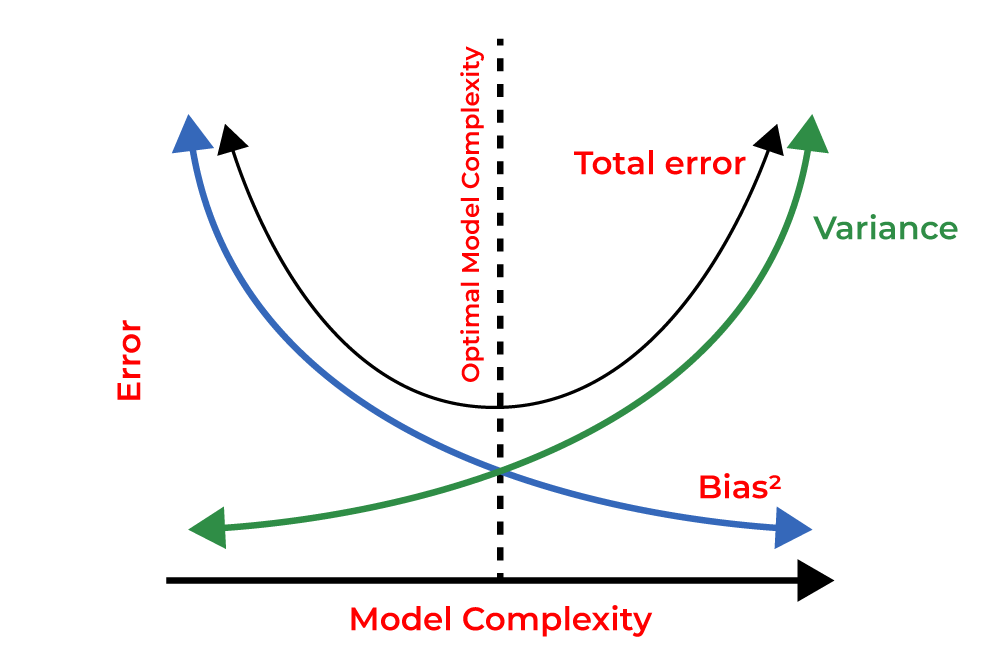

Regression evaluation metrics:

* **Mean Squared Error (MSE)**

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset:

**MSE = 1/n Σ(yi − ŷi)^2**

The difference between these two values is squared, which has the effect of removing the sign, resulting in a positive error value. The squaring also has the effect of inflating or magnifying large errors. That is, the larger the difference between the predicted and expected values, the larger the resulting squared positive error. This has the effect of “punishing” models more for larger errors when MSE is used as a loss function. It also has the effect of “punishing” models by inflating the average error score when used as a metric.

* **Root Mean Squared Error (RMSE)**

The Root Mean Squared Error is an extension of the mean squared error.

Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted. As such, it may be common to use MSE loss to train a regression predictive model, and to use RMSE to evaluate and report its performance.

The RMSE can be calculated as follows:

sqrt(1/n Σ(yi − ŷi)^2 )

* **Mean Absolute Error (MAE)**

Mean Absolute Error is a popular metric because, like RMSE, the units of the error score match the units of the target value that is being predicted. Unlike MSE and RMSE, the MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error.

As its name suggests, the MAE score is calculated as the average of the absolute error values. Therefore, the difference between an expected and predicted value may be positive or negative and is forced to be positive when calculating the MAE:

MAE = (1/n) Σ(i=1 to n) |y_i – ŷ_i|






* **Coefficient of determination (R2)**

All of the metrics so far compare the discrepancy between the predicted and actual values in order to evaluate the model. The coefficient of determination (more commonly referred to as R2 or R-Squared) is a metric that measures the proportion of variance in the validation results that can be explained by the model, as opposed to some anomalous aspect of the validation data.
The calculation for R2 is more complex than for the previous metrics. It compares the sum of squared differences between predicted and actual labels with the sum of squared differences between the actual label values and the mean of actual label values, like this:

R2 = 1- ∑(y-ŷ)2 ÷ ∑(y-ȳ)2

The important point is that the result is a value between 0 and 1 that describes the proportion of variance explained by the model. In simple terms, the closer to 1 this value is, the better the model is fitting the validation data.


Linear vs Polynomial regression

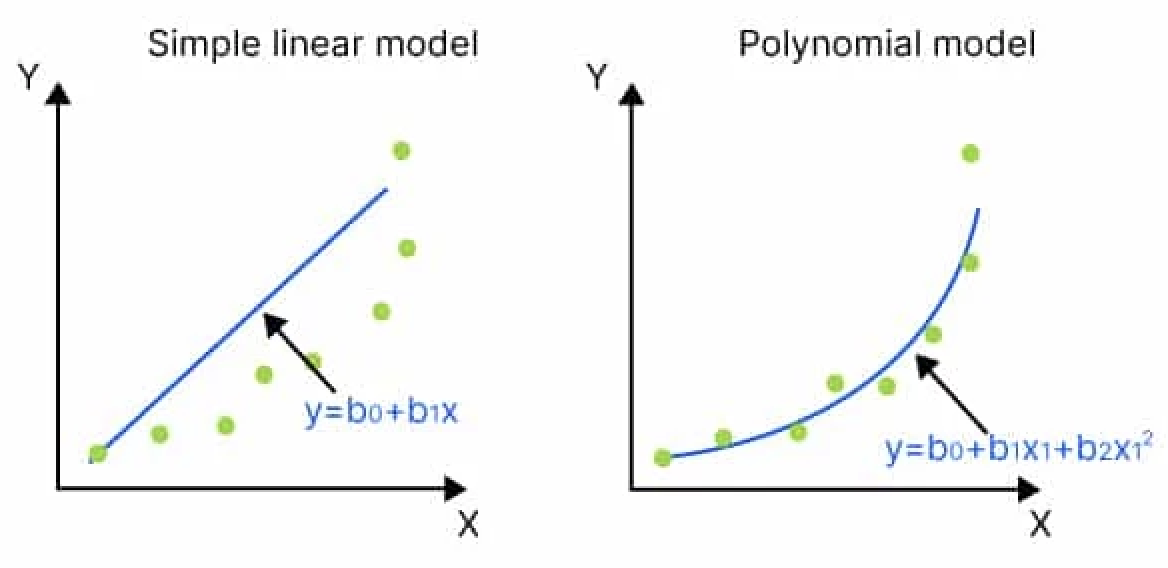

# Case study 1: Relation between grain size and hydraulic conductivity in borehole soils

3.1 Linear regression

In this example we will focus on a study, conducted

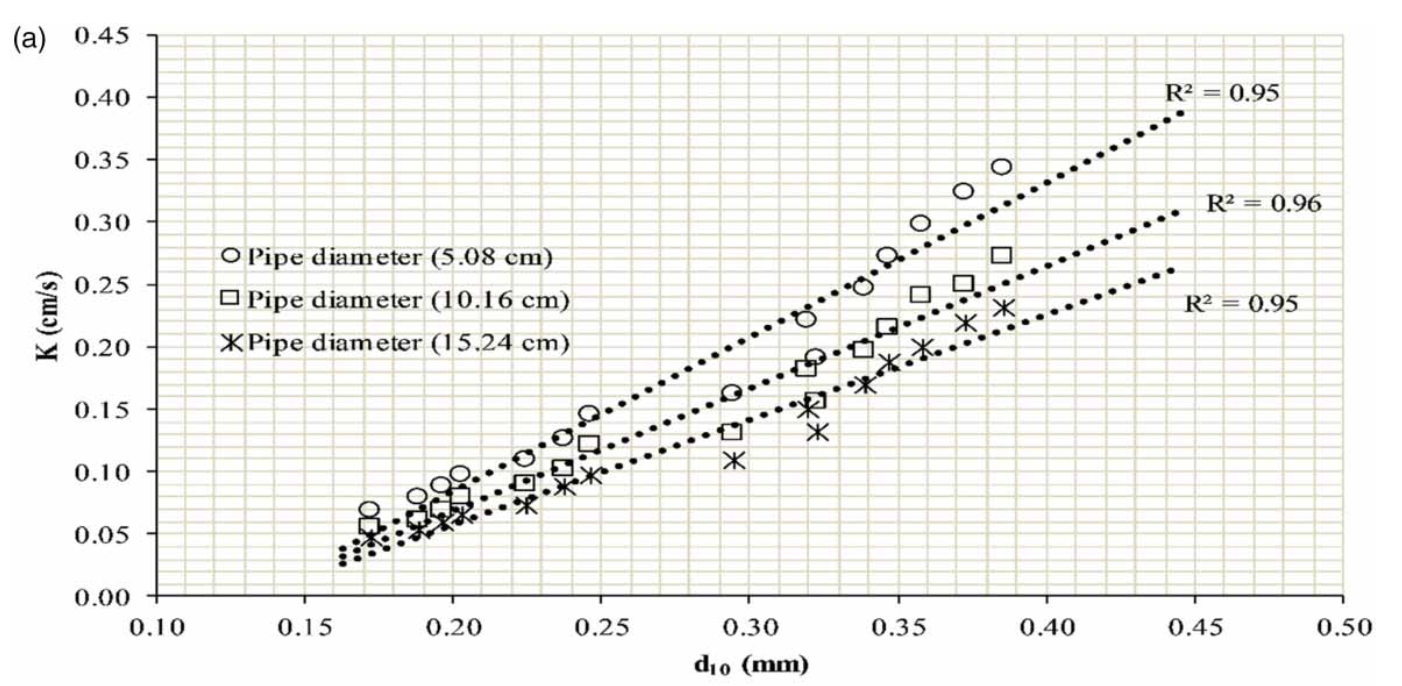

Python implememtation:

Step 0: Install scikit-learn and other needed libraries

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

Step 1: preparing features and labels

In [ ]:
# for python implemetation we will work only with datasets for pipe diameter 5.08 cm for simplicity

# X is grain size d10 [mm]
X1 = np.array([[0.386], [0.373], [0.358], [0.347], [0.342],
              [0.330], [0.325], [0.301], [0.297], [0.278],
              [0.225], [0.191], [0.187], [0.178], [0.173]])

# y is hydraulic conductivity K [cm/s] obtained from experiment
y1 = np.array([0.342, 0.323, 0.298, 0.272, 0.246,
              0.221, 0.190, 0.162, 0.145, 0.126,
              0.109, 0.098, 0.088, 0.078, 0.069])

After setting features x and labels y, we can now split initial datasets in training and testing datasets

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33)
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((10, 1), (5, 1), (10,), (5,))

Step 2: fitting the model

At this step we will use linear regression algorithm (Ordinary Least Squares) to fit the training datasets and get the linear correlation between x and y

In [ ]:
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression().fit(X_train1, y_train1)

Step 3: prediction

After training the model, we check how accurate it is. We make predictions on a test set

In [ ]:
y_pred1 = regressor1.predict(X_test1)

Step 4: evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test1, y_pred1):.2f}")
print(f"Root mean squared error: {root_mean_squared_error(y_test1, y_pred1):.2f}")
print(f"Mean absolute error: {mean_absolute_error(y_test1, y_pred1):.2f}")
print(f"Coefficient of determination: {r2_score(y_test1, y_pred1):.2f}")

Mean squared error: 0.00
Root mean squared error: 0.03
Mean absolute error: 0.03
Coefficient of determination: 0.88


Step 5: plotting

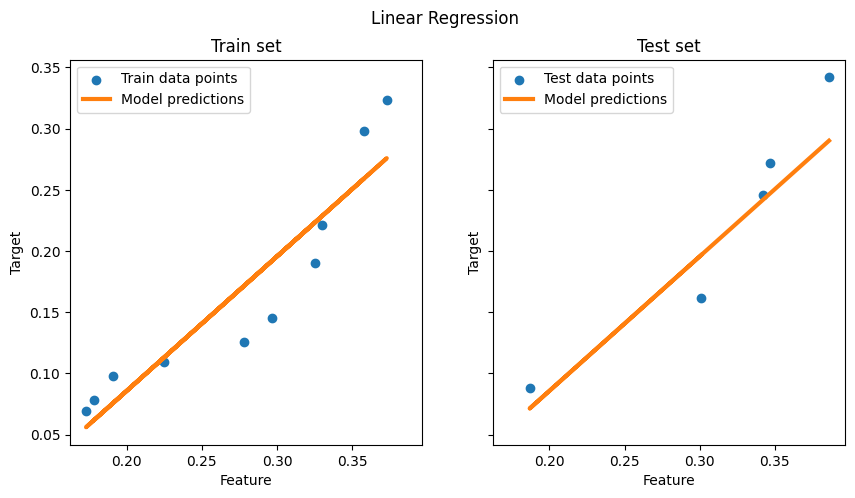

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train1, y_train1, label="Train data points")
ax[0].plot(
    X_train1,
    regressor1.predict(X_train1),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test1, y_test1, label="Test data points")
ax[1].plot(X_test1, y_pred1, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

3.2 Polynomial regression

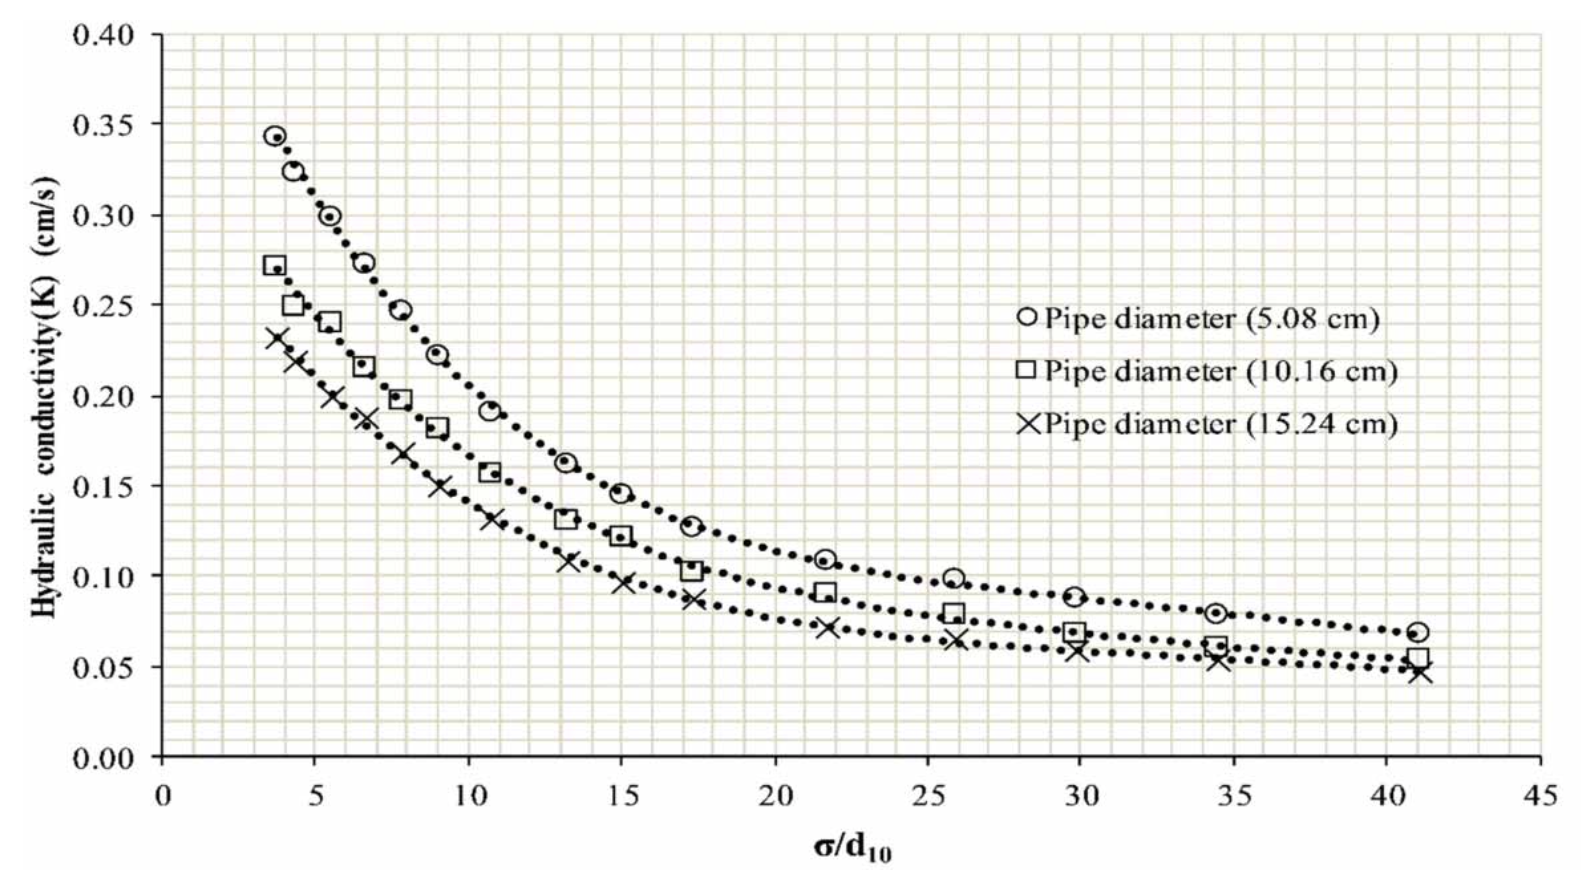

Step 1: data preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X2 = np.array([[3.805], [4.390], [5.539], [6.669], [7.876],
              [9.058], [10.787], [13.255], [15.104], [17.376],
              [21.754], [25.964], [29.868], [34.467], [41.066]])

y2 = np.array([0.342, 0.323, 0.298, 0.272, 0.246,
              0.221, 0.190, 0.162, 0.145, 0.126,
              0.109, 0.098, 0.088, 0.078, 0.069])

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25)

Optional step: sorting training and testing datasets for cleaner vizualization later

In [ ]:
dictionary_train = {}
count1 = 0
for x in X_train:
  dictionary_train[x[0]] = y_train[count1]
  count1 +=1
sorted_dict_train = dict(sorted(dictionary_train.items()))

dictionary_test = {}
count2 = 0
for x in X_test:
  dictionary_test[x[0]] = y_test[count2]
  count2 +=1
sorted_dict_test = dict(sorted(dictionary_test.items()))

X_train = np.array(list(sorted_dict_train.keys()))
X_test = np.array(list(sorted_dict_test.keys()))

y_train = np.array(list(sorted_dict_train.values()))
y_test = np.array(list(sorted_dict_test.values()))

Step 2: findin right polynomial degree

Best degree 5 with RMSE 0.002379736677434532


Text(0, 0.5, 'RMSE')

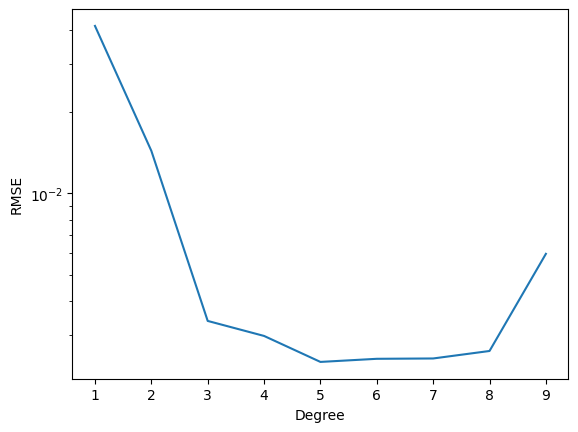

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

# Try different polynomial degrees
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train.reshape(-1, 1))

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test.reshape(-1, 1))
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg


print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [ ]:
poly = PolynomialFeatures(degree = best_degree, include_bias=False)
poly_features_train = poly.fit_transform(X_train.reshape(-1, 1))
poly_features_test = poly.fit_transform(X_test.reshape(-1, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features_train, y_train)

poly_reg_y_predicted = poly_reg_model.predict(poly_features_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

0.0033737004622137025

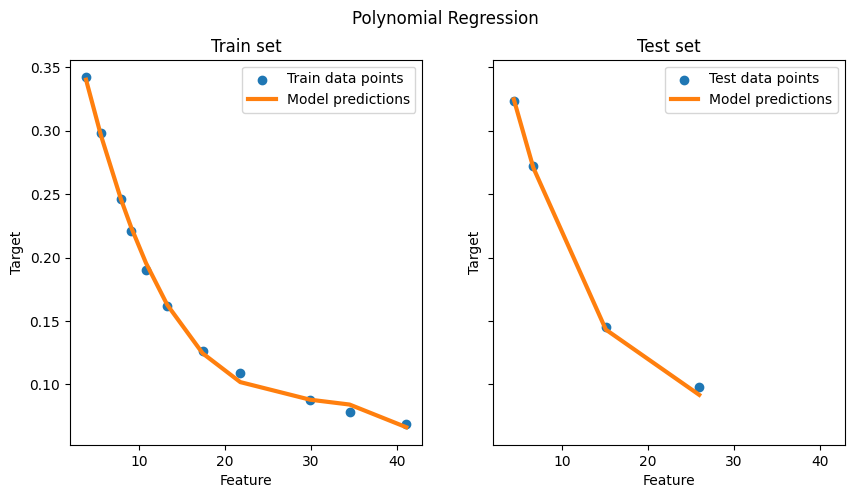

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    poly_reg_model.predict(poly_features_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, poly_reg_y_predicted, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Polynomial Regression")

plt.show()

#4. Classification

Classification, like regression, is a supervised machine learning technique; and therefore follows the same iterative process of training, validating, and evaluating models. Instead of calculating numeric values like a regression model, the algorithms used to train classification models calculate probability values for class assignment and the evaluation metrics used to assess model performance compare the predicted classes to the actual classes.

4.1 Binary classification

Binary classification algorithms are used to train a model that predicts one of two possible labels for a single class. Essentially, predicting true or false. In most real scenarios, the data observations used to train and validate the model consist of multiple feature (x) values and a y value that is either 1 or 0.

Case study 3: Is it sand?

In this case we will work with the model, which based on a grain size will classify different soils as sand or not sand.

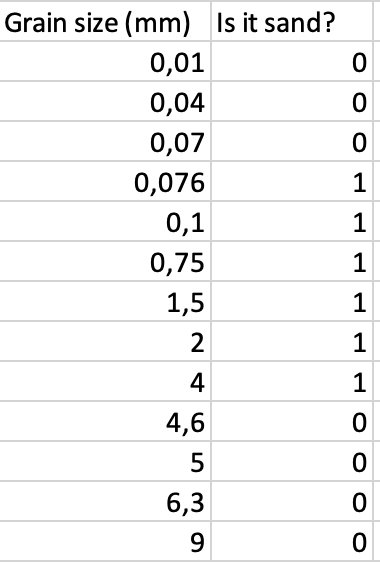

To train the model, we'll use an algorithm to fit the training data to a function that calculates the probability of the class label being true. Probability is measured as a value between 0.0 and 1.0, such that the total probability for all possible classes is 1.0.  There are many algorithms that can be used for binary classification, such as logistic regression, which derives a sigmoid (S-shaped) function with values between 0.0 and 1.0, like this:

picture

The function produced by the algorithm describes the probability of y being true (y=1) for a given value of x. Mathematically, you can express the function like this:
f(x) = P(y=1 | x)

The S-shaped curve describes the probability distribution so that plotting a value of x on the line identifies the corresponding probability that y is 1.
The diagram also includes a horizontal line to indicate the threshold at which a model based on this function will predict true (1) or false (0). The threshold lies at the mid-point for y (P(y) = 0.5). For any values at this point or above, the model will predict true (1); while for any values below this point it will predict false (0).

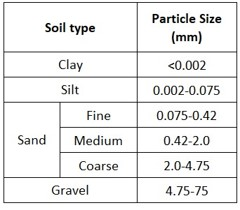

Case study 4: What soil is it?

For this demostntartion we will work with an algorithm, which will asign different soils to one of four types (clay, silt, sand or gravel) based on their particle sizes.

For siplicity each type will be referd by a number: clay = 0, silt = 1, sand = 2, gravel = 3.

In this case we're working with a multiclass classification model. To train this kind of model, we will have to use an algorithm, which will fit the training data to a function, which is going to predict a probability value for each class.

There are two types of algorithms for that:
1. One-vs-Rest (OvR) algorithms
2. Multinomial algorithms


One-vs-Resr algorithms

One-vs-Rest algorithms train a binary classification function for each class, each calculating the probability that the observation is an example of the target class. Each function calculates the probability of the observation being a specific class compared to any other class.

For our soil types classification model, the algorithm would essentially create four binary classification functions:

f0(x) = P(y=0 | x)
f1(x) = P(y=1 | x)
f2(x) = P(y=2 | x)
f3(x) = P(y=3 | x)

Each algorithm produces a sigmoid function that calculates a probability value between 0.0 and 1.0. A model trained using this kind of algorithm predicts the class for the function that produces the highest probability output.


Multinomial algorithms


As an alternative approach is to use a multinomial algorithm, which creates a single function that returns a multi-valued output. The output is a vector that contains the probability distribution for all possible classes - with a probability score for each class which when totaled add up to 1.0

Regardless of which type of algorithm is used, the model uses the resulting function to determine the most probable class for a given set of features (x) and predicts the corresponding class label (y).

#5. Overfitting and how to deal with it

5.1 What is overfitting?

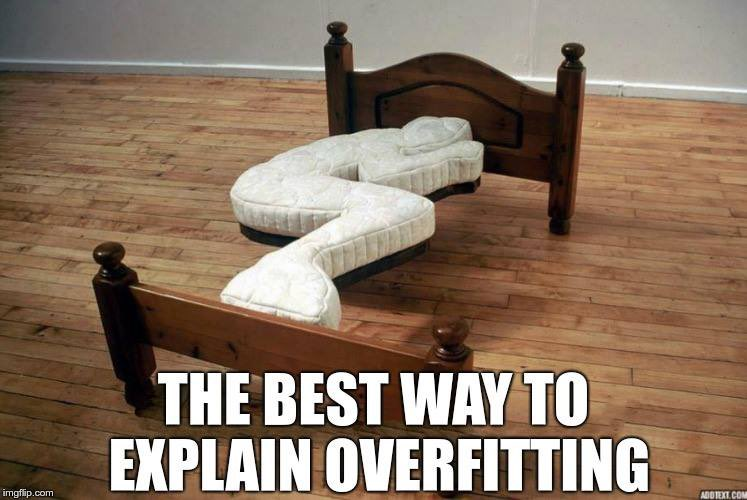

In machine learning, overfitting occurs when an algorithm fits too closely or even exactly to its training data, resulting in a model that can’t make accurate predictions or conclusions from any data other than the training data.

Overfitting can happen because:

* The machine learning model is too complex: it memorizes very subtle patterns in the training data that don’t generalize well

* The training data size is too small for the model complexity and/or contains large amounts of noise

Overfitting defeats purpose of the machine learning model,  generalization to new data is ultimately what allows machine learning algorithms to make predictions and classify data.

It is important to check for overfitting because it can disguise itself as a highly accurate model during training.
To do that part of the training dataset is typically set aside as the “test set” to check for overfitting. If the training data has a low error rate and the test data has a high error rate, it signals overfitting.

1718273106637.svg

5.2 Regularization

One way to deal with overfitting is regularization. It is a method for increasing a model’s ability to produce accurate predictions on new datasets (generalizability). Regularization provides this increased generalizability at the sake of increased training error. In other words, regularization methods typically lead to less accurate predictions on training data but more accurate predictions on test data. To put it simply, it increses bias and decreases variance: so called "bias-variance trade off" occurs

5.3 Types of regularization in machine learning

Dataset

Data augmentation is a regularization technique that modifies model training data. It expands the size of the training set by creating artificial data samples derived from pre-existing training data. Adding more samples to the training set, particularly of instances rare in real world data, exposes a model to a greater quantity and diversity of data from which it learns.

Model training

Early stopping is perhaps the most readily implemented regularization technique. In short, it limits the number of iterations during model training. Here, a model continuously passes through the training data, stopping once there is no improvement (and perhaps even deterioration) in training and validation accuracy. The goal is to train a model until it has reached the lowest possible training error preceding a plateau or increase in validation error.

5.4 Types of regularization with linear models

In [ ]:
from sklearn.model_selection import train_test_split

# Generate synthetic dataset to compare 3 different regularization techniques

np.random.seed(42)
X = np.random.rand(100, 5)  # 5 features
y = 3 * X[:, 0] + 2 * X[:, 1] + 0.1 * X[:, 2] - 1.5 * X[:, 3] - 0.2 * X[:, 4] + np.random.randn(100) * 0.1  # Linear relationship with noise

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Lasso regression introduces an L1 penalty (sum of absolute coefficients) to the loss function. It shrinks some coefficients to zero, meaning it can completely remove less important features from the model. This makes Lasso useful for feature selection, as it keeps only the most important predictors.

Lasso Coefficients: [ 1.57862865  0.84792609  0.         -0.31404863 -0.        ]


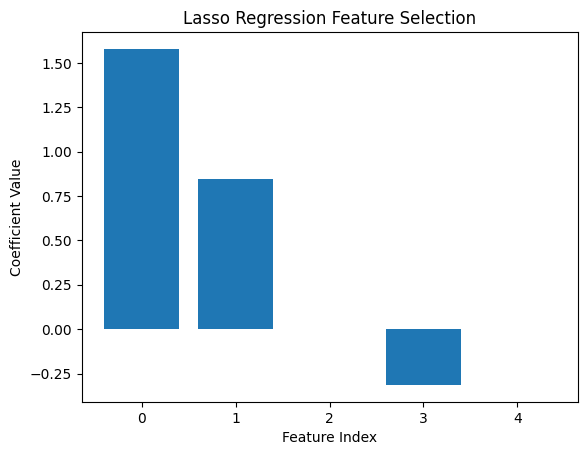

In [ ]:
from sklearn.linear_model import Lasso

# Train Lasso Regression model
lasso = Lasso(alpha=0.1)  # Regularization strength
lasso.fit(X_train, y_train)

# Print model coefficients
print("Lasso Coefficients:", lasso.coef_)

# Plot feature importance
plt.bar(range(len(lasso.coef_)), lasso.coef_)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression Feature Selection")
plt.show()

- Ridge regression adds an L2 penalty (sum of squared coefficients) to the loss function. It shrinks the coefficients of features but doesn’t make them zero, meaning it keeps all features in the model while reducing their influence of certain features. This is useful when you believe all features are valuable but want to limit their impact.

Ridge Coefficients: [ 2.91734136  1.94631553  0.16052383 -1.45922151 -0.25200872]


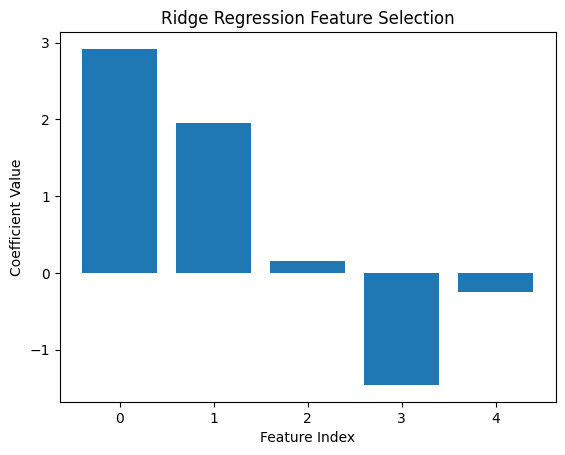

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)  # Regularization strength
ridge.fit(X_train, y_train)

# Print model coefficients
print("Ridge Coefficients:", ridge.coef_)

# Plot feature importance
plt.bar(range(len(ridge.coef_)), ridge.coef_)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Ridge Regression Feature Selection")
plt.show()

- Elastic net regression is a technique that combines L1 (Lasso) and L2 (Ridge) penalties to perform feature selection and handle multicollinearity, balancing coefficient shrinkage and sparsity. Elastic Net is useful when there are many correlated features, as it balances Ridge and Lasso to avoid Lasso’s tendency to remove one feature randomly while keeping another. It provides a more stable and generalizable model compared to using Lasso or Ridge alone.

Ridge Coefficients: [ 1.39191861  0.87362505  0.         -0.53693138 -0.07255555]


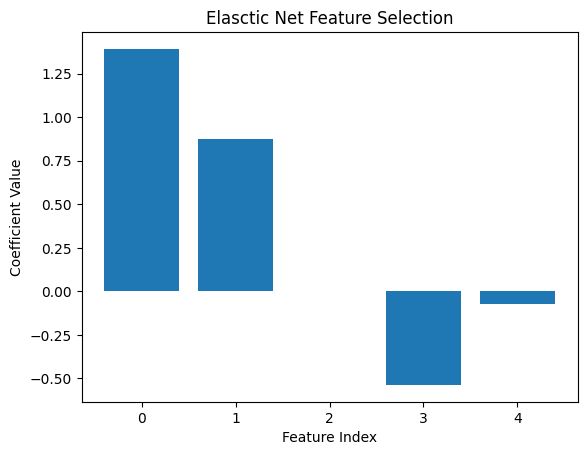

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1)  # Regularization strength
elastic_net.fit(X_train, y_train)

# Print model coefficients
print("Ridge Coefficients:", elastic_net.coef_)

# Plot feature importance
plt.bar(range(len(ridge.coef_)), elastic_net.coef_)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Elasctic Net Feature Selection")
plt.show()